In [3]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
import pandas as pd
df = pd.read_csv('/content/State_time_series.csv')
df.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [6]:
import pandas as pd
df = pd.read_csv("State_time_series.csv")
for col in df.columns:
    if 'date' in col.lower() and df[col].dtype == 'object':
        df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.dtypes)

Date                                    datetime64[ns]
RegionName                                      object
DaysOnZillow_AllHomes                          float64
InventorySeasonallyAdjusted_AllHomes           float64
InventoryRaw_AllHomes                          float64
                                             ...      
ZRI_AllHomes                                   float64
ZRI_AllHomesPlusMultifamily                    float64
ZriPerSqft_AllHomes                            float64
Zri_MultiFamilyResidenceRental                 float64
Zri_SingleFamilyResidenceRental                float64
Length: 82, dtype: object


In [7]:
col_name = 'Date'
for value in df[col_name].head(10):
    print(f"{col_name}: {value}")

Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00
Date: 1996-04-30 00:00:00


In [8]:
import pandas as pd
df_selected = df[['Date', 'RegionName', 'ZHVI_AllHomes']].copy()
print(df_selected.head())

        Date  RegionName  ZHVI_AllHomes
0 1996-04-30     Alabama        79500.0
1 1996-04-30     Arizona       103600.0
2 1996-04-30    Arkansas        64400.0
3 1996-04-30  California       157900.0
4 1996-04-30    Colorado       128100.0


In [9]:
import pandas as pd
print("Missing values before interpolation:", df['ZHVI_AllHomes'].isna().sum())
df['ZHVI_AllHomes'] = df['ZHVI_AllHomes'].interpolate(method='linear')
print("Missing values after interpolation:", df['ZHVI_AllHomes'].isna().sum())
print(df[['Date', 'RegionName', 'ZHVI_AllHomes']].head())

Missing values before interpolation: 774
Missing values after interpolation: 0
        Date  RegionName  ZHVI_AllHomes
0 1996-04-30     Alabama        79500.0
1 1996-04-30     Arizona       103600.0
2 1996-04-30    Arkansas        64400.0
3 1996-04-30  California       157900.0
4 1996-04-30    Colorado       128100.0


In [10]:
import pandas as pd
import numpy as np
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['RegionName', 'Date'])
def handle_outliers_rolling_median(series, window=3, threshold=2.0):
    rolling_median = series.rolling(window=window, center=True, min_periods=1).median()
    diff = (series - rolling_median).abs()
    mad = diff.median()
    outliers = diff > (threshold * mad)
    series[outliers] = rolling_median[outliers]
    return series
df['ZHVI_AllHomes_Cleaned'] = df.groupby('RegionName')['ZHVI_AllHomes'] \
                                .transform(lambda x: handle_outliers_rolling_median(x, window=3, threshold=2.0))
print(df[df['RegionName'] == 'California'][['Date', 'ZHVI_AllHomes', 'ZHVI_AllHomes_Cleaned']].head(15))

          Date  ZHVI_AllHomes  ZHVI_AllHomes_Cleaned
3   1996-04-30       157900.0               157850.0
47  1996-05-31       157800.0               157800.0
93  1996-06-30       157500.0               157500.0
139 1996-07-31       157300.0               157300.0
185 1996-08-31       157000.0               157000.0
231 1996-09-30       156800.0               156900.0
277 1996-10-31       156900.0               156900.0
323 1996-11-30       157200.0               157200.0
369 1996-12-31       157500.0               157500.0
415 1997-01-31       158100.0               158100.0
461 1997-02-28       159000.0               159000.0
507 1997-03-31       159800.0               159800.0
553 1997-04-30       160000.0               160000.0
599 1997-05-31       160300.0               160300.0
645 1997-06-30       160600.0               160600.0


In [11]:
data=df[['Date', 'RegionName', 'ZHVI_AllHomes_Cleaned']].copy()
data=data.rename(columns={
    'Date': 'ds',
    'RegionName': 'region',
    'ZHVI_AllHomes_Cleaned': 'y'
})

In [12]:
state_name = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'DistrictofColumbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'NewHampshire',
       'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina',
       'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'RhodeIsland', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'UnitedStates', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming']
pop_data = data[data['region'].isin(state_name)][['ds','region', 'y']].copy()

In [13]:
pop_data = pop_data.sort_values('ds').reset_index(drop=True)
invalid_dates = pop_data[pop_data['ds'] < pop_data['ds'].min()]
print(invalid_dates)
pop_data = pop_data[pop_data['ds'] >= pd.to_datetime('1996-04-30')]

Empty DataFrame
Columns: [ds, region, y]
Index: []


In [15]:
from prophet import Prophet
from joblib import Parallel, delayed
import pandas as pd
def train_and_forecast(region, data, periods=12, freq='M'):
    """Train Prophet model and forecast for a single region"""
    region_data = data[data['region'] == region][['ds', 'y']]
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.05
    )
    model.fit(region_data)
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
    last_historical = region_data['y'].iloc[-1]
    first_forecast = forecast[forecast['ds'] > region_data['ds'].max()]['yhat'].iloc[0]
    continuity_gap = abs(first_forecast - last_historical)
    summary = {
        'region': region,
        'last_historical': last_historical,
        'first_forecast': first_forecast,
        'gap_value': continuity_gap,
        'gap_percent': (first_forecast - last_historical)/last_historical * 100
    }
    return region, model, forecast, summary
regions = pop_data['region'].unique()
results = Parallel(n_jobs=-1)(
    delayed(train_and_forecast)(region, pop_data) for region in regions
)
models = {r: m for r, m, f, s in results}
forecasts = {r: f for r, m, f, s in results}
continuity_summaries = {r: s for r, m, f, s in results}
print("\n=== Continuity Checks ===")
for region, summary in continuity_summaries.items():
    print(f"{region}: Last={summary['last_historical']:.0f}, "
          f"First Forecast={summary['first_forecast']:.0f}, "
          f"Gap={summary['gap_value']:.0f} ({summary['gap_percent']:.1f}%)")
texas_forecast = forecasts['Texas']
future_only = texas_forecast[texas_forecast['ds'] > pop_data[pop_data['region']=='Texas']['ds'].max()]
print("\nTEXAS HOME VALUE FORECAST - Next 12 Months:")
print("="*60)
for idx, row in future_only.iterrows():
    date = row['ds'].strftime('%Y-%m')
    predicted = row['yhat']
    lower = row['yhat_lower']
    upper = row['yhat_upper']
    print(f"{date}: ${predicted:,.0f} (${lower:,.0f} - ${upper:,.0f})")


=== Continuity Checks ===
Alabama: Last=126850, First Forecast=125698, Gap=1152 (-0.9%)
Idaho: Last=200000, First Forecast=194604, Gap=5396 (-2.7%)
Pennsylvania: Last=162850, First Forecast=160494, Gap=2356 (-1.4%)
Hawaii: Last=618500, First Forecast=623532, Gap=5032 (0.8%)
RhodeIsland: Last=263900, First Forecast=257776, Gap=6124 (-2.3%)
Georgia: Last=160550, First Forecast=161243, Gap=693 (0.4%)
SouthCarolina: Last=147650, First Forecast=145247, Gap=2403 (-1.6%)
Florida: Last=215700, First Forecast=217067, Gap=1367 (0.6%)
Tennessee: Last=146200, First Forecast=142737, Gap=3463 (-2.4%)
Oregon: Last=317850, First Forecast=320063, Gap=2213 (0.7%)
Texas: Last=173600, First Forecast=174050, Gap=450 (0.3%)
Utah: Last=260700, First Forecast=256795, Gap=3905 (-1.5%)
Connecticut: Last=246750, First Forecast=244053, Gap=2697 (-1.1%)
Colorado: Last=343700, First Forecast=348810, Gap=5110 (1.5%)
Virginia: Last=246350, First Forecast=246258, Gap=92 (-0.0%)
California: Last=522250, First Forecast

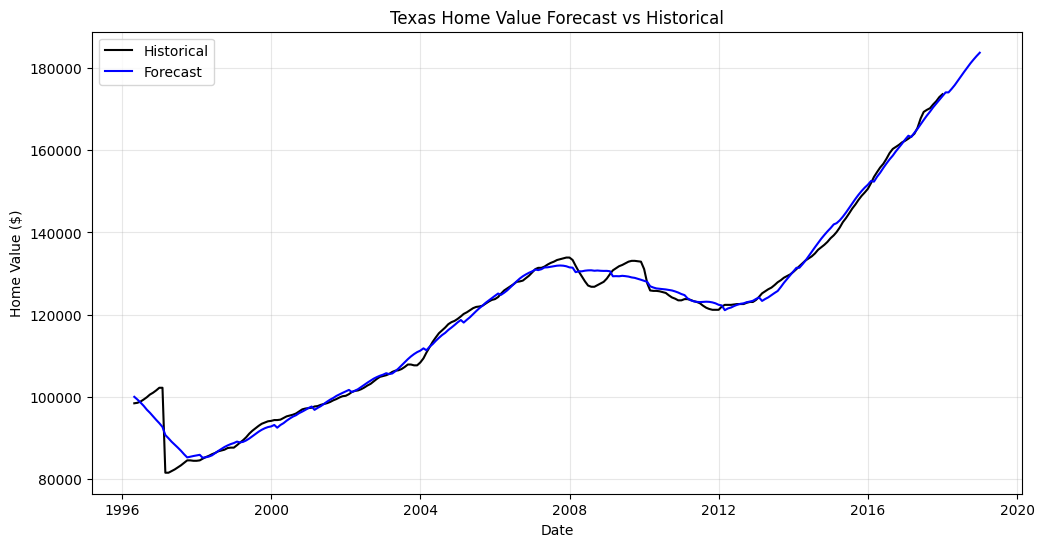

In [16]:
import matplotlib.pyplot as plt
def plot_forecast_with_history(region, model, forecast, pop_data):
    plt.figure(figsize=(12, 6))
    region_hist = pop_data[pop_data['region'] == region]
    plt.plot(region_hist['ds'], region_hist['y'], label="Historical", color="black")
    plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color="blue")
    plt.title(f"{region} Home Value Forecast vs Historical")
    plt.xlabel("Date")
    plt.ylabel("Home Value ($)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
plot_forecast_with_history("Texas", models["Texas"], forecasts["Texas"], pop_data)

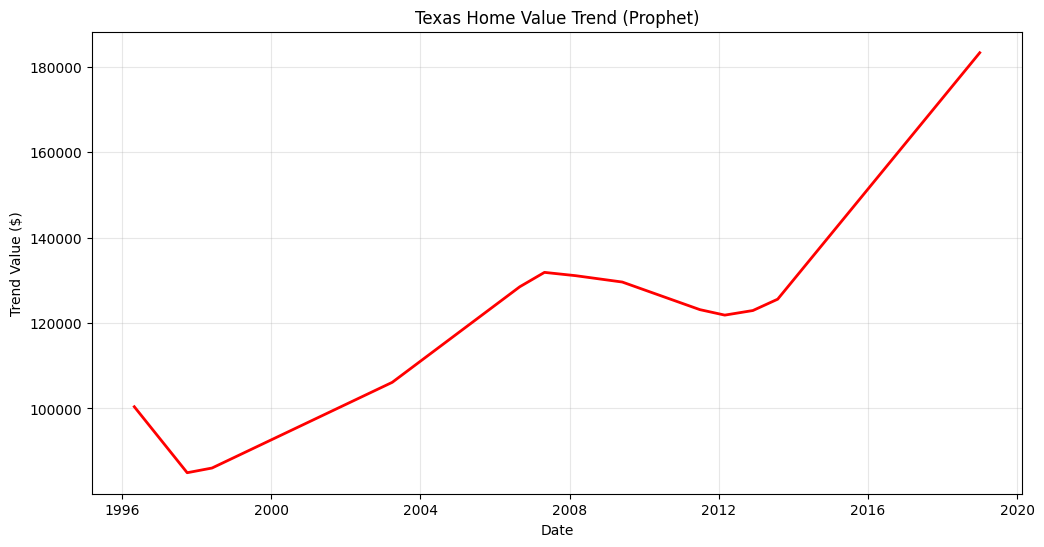

In [17]:
import matplotlib.pyplot as plt
region = "Texas"
region_forecast = forecasts[region]
plt.figure(figsize=(12, 6))
plt.plot(region_forecast['ds'], region_forecast['trend'], color="red", linewidth=2)
plt.title(f"{region} Home Value Trend (Prophet)")
plt.xlabel("Date")
plt.ylabel("Trend Value ($)")
plt.grid(True, alpha=0.3)
plt.show()

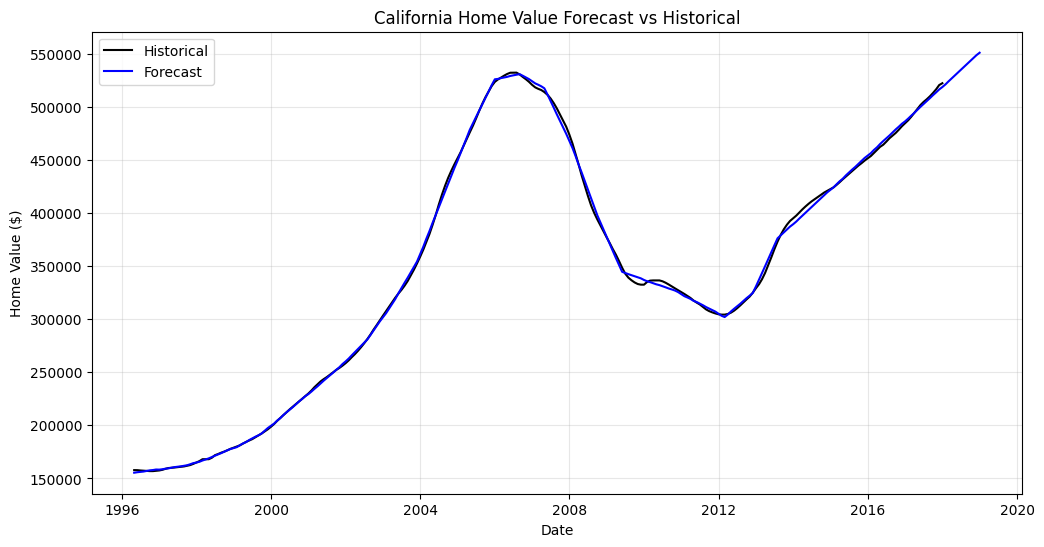

In [18]:
import matplotlib.pyplot as plt
def plot_forecast_with_history(region, model, forecast, pop_data):
    plt.figure(figsize=(12, 6))
    region_hist = pop_data[pop_data['region'] == region]
    plt.plot(region_hist['ds'], region_hist['y'], label="Historical", color="black")
    plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color="blue")
    plt.title(f"{region} Home Value Forecast vs Historical")
    plt.xlabel("Date")
    plt.ylabel("Home Value ($)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
plot_forecast_with_history("California", models["California"], forecasts["California"], pop_data)

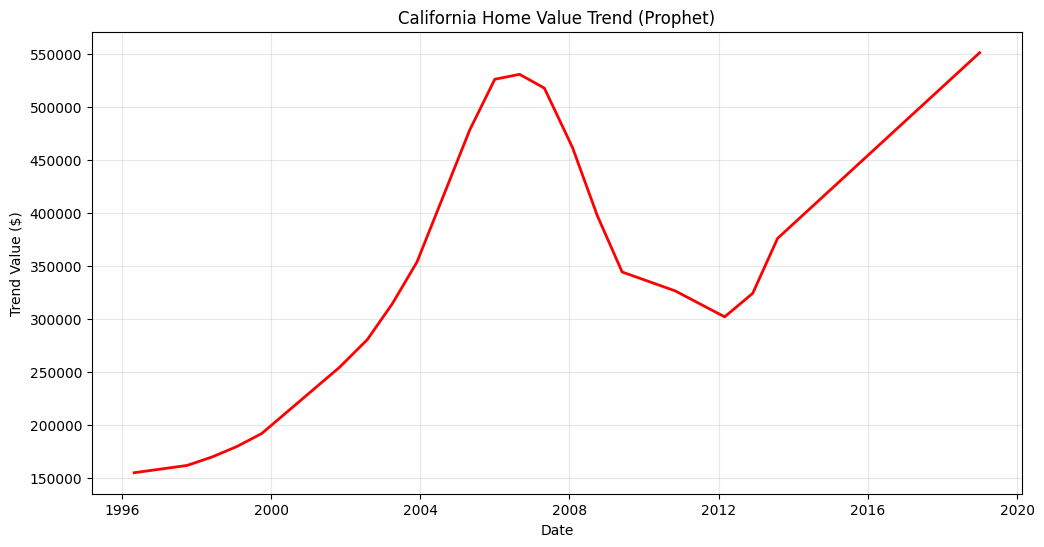

In [19]:
import matplotlib.pyplot as plt
region = "California"
region_forecast = forecasts[region]
plt.figure(figsize=(12, 6))
plt.plot(region_forecast['ds'], region_forecast['trend'], color="red", linewidth=2)
plt.title(f"{region} Home Value Trend (Prophet)")
plt.xlabel("Date")
plt.ylabel("Trend Value ($)")
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
import joblib
import os
# Create the directory if it doesn't exist
os.makedirs("saved_models", exist_ok=True)
# Save the models
joblib.dump(models, "saved_models/all_regions_prophet_models.pkl")
print("Models saved successfully!")

Models saved successfully!
